In [168]:
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns
import os
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [172]:
df_list = []
for f in os.listdir("./output"):
    df = pd.read_csv("output/" + f)
    df['ds'] = os.path.splitext(f)[0]
    df_list.append(df)
df = pd.concat(df_list)
# x and y dropout are equal combine them and call it dropout
df.drop(columns=['params.y_dropout'], inplace=True)
df.rename(columns={'params.x_dropout': 'params.dropout'}, inplace=True)
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.logLik,metrics.train_logLik,metrics.restored_epoch,metrics.stopped_epoch,...,params.seed,params.use_multiprocessing,params.validation_freq,params.y_layers,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user,ds
0,e73ff1a773664720a2068dd88b73437a,101967997689365517,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:48:45.906000+00:00,2023-05-16 04:49:38.873000+00:00,33.238518,13.012683,156.0,256.0,...,1,False,1,10,bittersweet-tern-340,"[{""run_id"": ""e73ff1a773664720a2068dd88b73437a""...",LOCAL,hp.py,daniel,real
1,ebd4095937b3435583f1c31a66229825,101967997689365517,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:47:54.747000+00:00,2023-05-16 04:49:21.326000+00:00,26.621672,12.961045,367.0,467.0,...,3,False,1,10,unique-ray-755,"[{""run_id"": ""ebd4095937b3435583f1c31a66229825""...",LOCAL,hp.py,daniel,real
2,41956a977e384e2c8d3825960ce1c7c6,101967997689365517,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:47:08.267000+00:00,2023-05-16 04:48:46.890000+00:00,13.600017,12.643394,309.0,409.0,...,1,False,1,10,treasured-seal-984,"[{""run_id"": ""41956a977e384e2c8d3825960ce1c7c6""...",LOCAL,hp.py,daniel,real
3,ac031cd9956d40f3a604e08a47fb4942,101967997689365517,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:45:46.151000+00:00,2023-05-16 04:48:45.816000+00:00,10.642325,2.649433,828.0,928.0,...,1,False,1,10,invincible-perch-760,"[{""run_id"": ""ac031cd9956d40f3a604e08a47fb4942""...",LOCAL,hp.py,daniel,real
4,d96dadb3e79540918c1509a4712e60cf,101967997689365517,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-16 04:45:17.999000+00:00,2023-05-16 04:47:54.662000+00:00,19.583538,9.964409,887.0,987.0,...,3,False,1,10,upbeat-swan-986,"[{""run_id"": ""d96dadb3e79540918c1509a4712e60cf""...",LOCAL,hp.py,daniel,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,abb7bce6382d4f2c9754202bb7695d48,619174485308676943,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:51:25.070000+00:00,2023-05-15 13:52:24.785000+00:00,-1.547176,-2.034631,124.0,224.0,...,1,False,1,10,unique-bat-317,"[{""run_id"": ""abb7bce6382d4f2c9754202bb7695d48""...",LOCAL,hp.py,daniel,boston
2588,ea11e6faf54e42e69924e857625c7126,619174485308676943,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:51:25.009000+00:00,2023-05-15 13:51:55.928000+00:00,-4.687660,-1.909932,30.0,130.0,...,1,False,1,2,glamorous-bug-743,"[{""run_id"": ""ea11e6faf54e42e69924e857625c7126""...",LOCAL,hp.py,daniel,boston
2589,8633a2269ca645febdfc75d7ba083228,619174485308676943,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:51:24.982000+00:00,2023-05-15 13:52:14.507000+00:00,-2.630394,-3.366477,140.0,240.0,...,1,False,1,2,tasteful-steed-254,"[{""run_id"": ""8633a2269ca645febdfc75d7ba083228""...",LOCAL,hp.py,daniel,boston
2590,42892596e3f0418a9a75ed971e5f33a4,619174485308676943,FINISHED,file:///home/daniel/remote/NEAT/neat/python/ml...,2023-05-15 13:51:24.898000+00:00,2023-05-15 13:52:57.957000+00:00,2.253969,-0.759992,117.0,217.0,...,1,False,1,10,skittish-calf-209,"[{""run_id"": ""42892596e3f0418a9a75ed971e5f33a4""...",LOCAL,hp.py,daniel,boston


In [173]:
df.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.logLik', 'metrics.train_logLik',
       'metrics.restored_epoch', 'metrics.stopped_epoch', 'metrics.val_logLik',
       'params.opt_beta_2', 'params.initial_epoch', 'params.min_delta',
       'params.base_distribution', 'params.baseline', 'params.workers',
       'params.y_top_units', 'params.shuffle', 'params.y_base_units',
       'params.dropout', 'params.optimizer', 'params.x_layers',
       'params.validation_batch_size', 'params.data_path', 'params.batch_size',
       'params.opt_beta_1', 'params.steps_per_epoch', 'params.epochs',
       'params.validation_split', 'params.learning_rate', 'params.opt_epsilon',
       'params.opt_learning_rate', 'params.patience', 'params.opt_name',
       'params.opt_decay', 'params.class_weight', 'params.log_level',
       'params.opt_amsgrad', 'params.validation_steps', 'params.monitor',
       'params.log_file', 'params.fast', 'params.sample_wei

In [174]:
all_params = ['params.model_type',
       'params.y_base_units', 'params.y_top_units', 'params.y_layers',
       'params.learning_rate', 'params.x_layers', 'params.x_units', 'params.seed',
       'params.dropout']
relevant_params = ['params.y_base_units', 'params.y_top_units', 'params.y_layers',
       'params.learning_rate', 'params.x_layers', 'params.x_units',
       'params.dropout']
df = df[["experiment_id", 'ds'] +  all_params +["metrics.val_logLik", "metrics.train_logLik"]]
df_ls = df[df['params.model_type'] == "ModelType.LS"]

In [175]:
df.groupby(['experiment_id'] + all_params).describe()

metrics.val_logLik   
                                                                                                                                                                                        count   
experiment_id      params.model_type params.y_base_units params.y_top_units params.y_layers params.learning_rate params.x_layers params.x_units params.seed params.dropout                      
101967997689365517 ModelType.INTER   20                  5                  2               0.001                1               20             1           0.0                           1.0  \
                                                                                                                                                            0.5                           1.0   
                                                                                                                                                2           0.0                           1.0   
                                                                                                                                                            0.5                           1.0   
                                                                                                                                                3           0.0                           1.0   
...                                                                                                                                                                                       ...   
980626744009631212 ModelType.LS      100                 20                 10              0.010                2               100            1           0.5                           1.0   
                                                                                                                                                2           0.0                           1.0   
                                                                                                                                                            0.5                           1.0   
                                                                                                                                                3           0.0                           1.0   
                                                                                                                                                            0.5                           1.0   

                                                                                                                                                                                        
                                                                                                                                                                                 mean   
experiment_id      params.model_type params.y_base_units params.y_top_units params.y_layers params.learning_rate params.x_layers params.x_units params.seed params.dropout              
101967997689365517 ModelType.INTER   20                  5                  2               0.001                1               20             1           0.0              6.916036  \
                                                                                                                                                            0.5              6.963880   
                                                                                                                                                2           0.0              4.715024   
                                                                                                                                                            0.5              7.884267   
                                                                                                                                                3           0.0              

In [176]:
# zscore
from scipy.stats import zscore
df.loc[:,'val_logLik'] = df[['metrics.val_logLik','ds']].groupby('ds').apply(zscore).to_numpy()
df.loc[:,'train_logLik'] = df[['metrics.train_logLik','ds']].groupby('ds').apply(zscore).to_numpy()

/tmp/ipykernel_383599/1930749130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'val_logLik'] = df[['metrics.val_logLik','ds']].groupby('ds').apply(zscore).to_numpy()
/tmp/ipykernel_383599/1930749130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'train_logLik'] = df[['metrics.train_logLik','ds']].groupby('ds').apply(zscore).to_numpy()


In [177]:
df

,experiment_id,ds,params.model_type,params.y_base_units,params.y_top_units,params.y_layers,params.learning_rate,params.x_layers,params.x_units,params.seed,params.dropout,metrics.val_logLik,metrics.train_logLik,val_logLik,train_logLik
0,101967997689365517,real,ModelType.INTER,50,20,10,0.001,2,100,1,0.5,2.312002,13.012683,0.556183,0.342306
1,101967997689365517,real,ModelType.INTER,20,20,10,0.001,2,50,3,0.5,6.243618,12.961045,0.524480,0.553261
2,101967997689365517,real,ModelType.INTER,100,20,10,0.001,2,50,1,0.5,4.753773,12.643394,0.578520,0.392761
3,101967997689365517,real,ModelType.LS,50,20,10,0.001,2,100,1,0.5,2.036691,2.649433,-0.227388,-0.563215
4,101967997689365517,real,ModelType.LS,20,20,10,0.001,2,50,3,0.5,4.984379,9.964409,0.530857,0.443805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,619174485308676943,boston,ModelType.LS,50,5,10,0.010,1,50,1,0.0,6.870140,-2.034631,-0.743959,-0.717765
2588,619174485308676943,boston,ModelType.LS,50,5,2,0.010,2,50,1,0.0,5.710321,-1.909932,-1.248757,-1.143388
2589,619174485308676943,boston,ModelType.LS,20,5,2,0.010,1,20,1,0.0,3.217280,-3.366477,-1.090879,-0.957796
2590,619174485308676943,boston,ModelType.LS,100,5,10,0.010,1,20,1,0.0,7.532862,-0.759992,-0.533174,-0.519759


In [178]:
plt.figure(figsize=(10,5))
from scipy.stats import zscore
df.groupby('ds').apply(zscore)
sns.boxplot(df, x='ds', y="val_logLik", hue='params.model_type')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 1000x500 with 0 Axes>

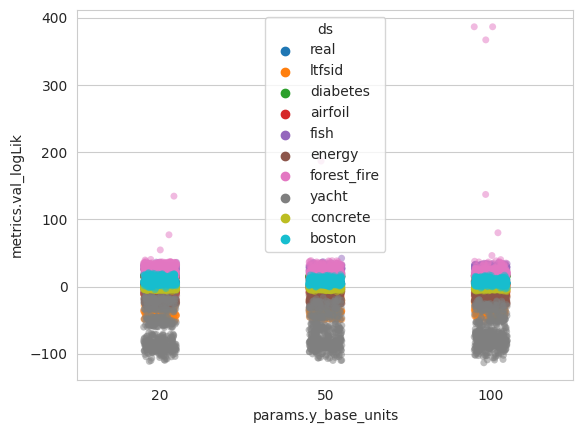

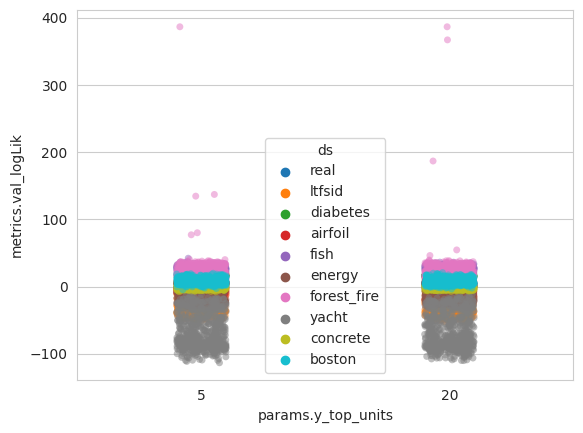

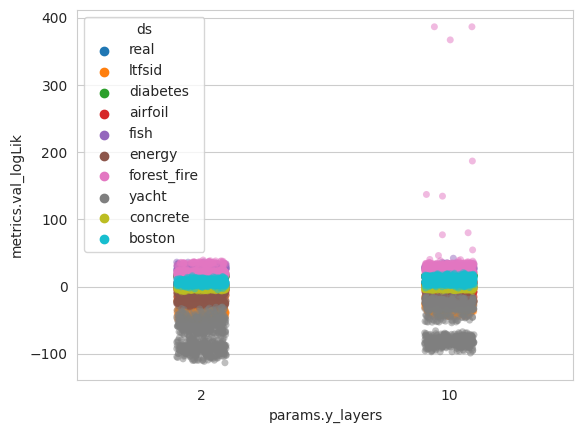

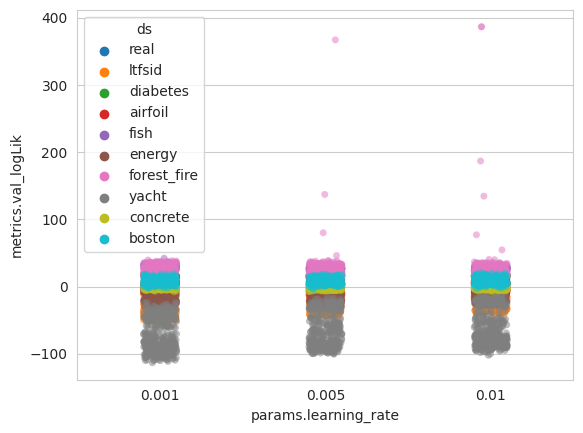

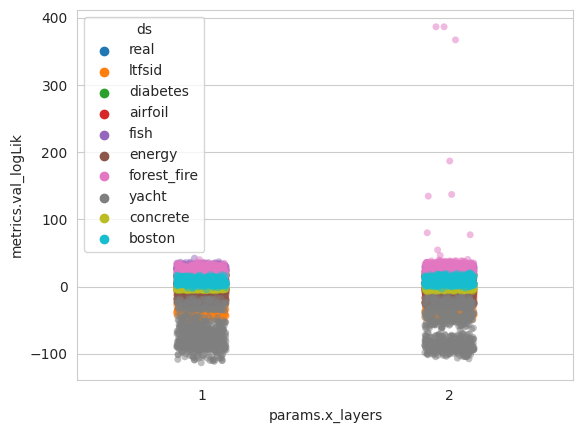

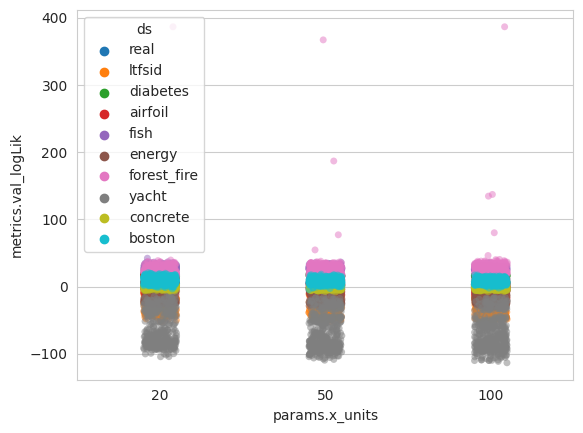

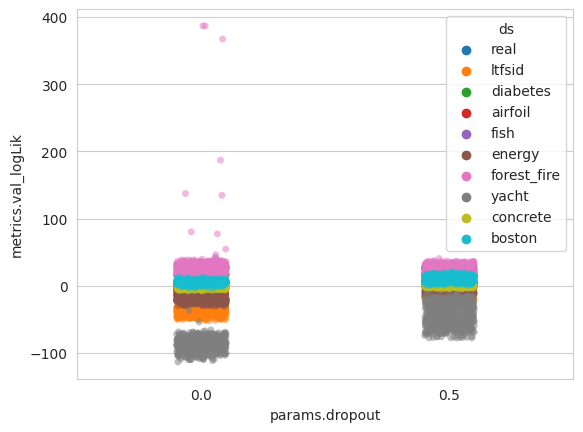

In [127]:
from sklearn.linear_model import LinearRegression
df_ls_ = df[df['params.model_type'] == "ModelType.LS"]
for param in relevant_params:
    plt.figure()
    sns.stripplot(df_ls_, x=param, y="metrics.val_logLik", hue='ds', alpha=0.5)
# sns.stripplot(df, x='ds', y="metrics.val_logLik", hue='params.learning_rate')

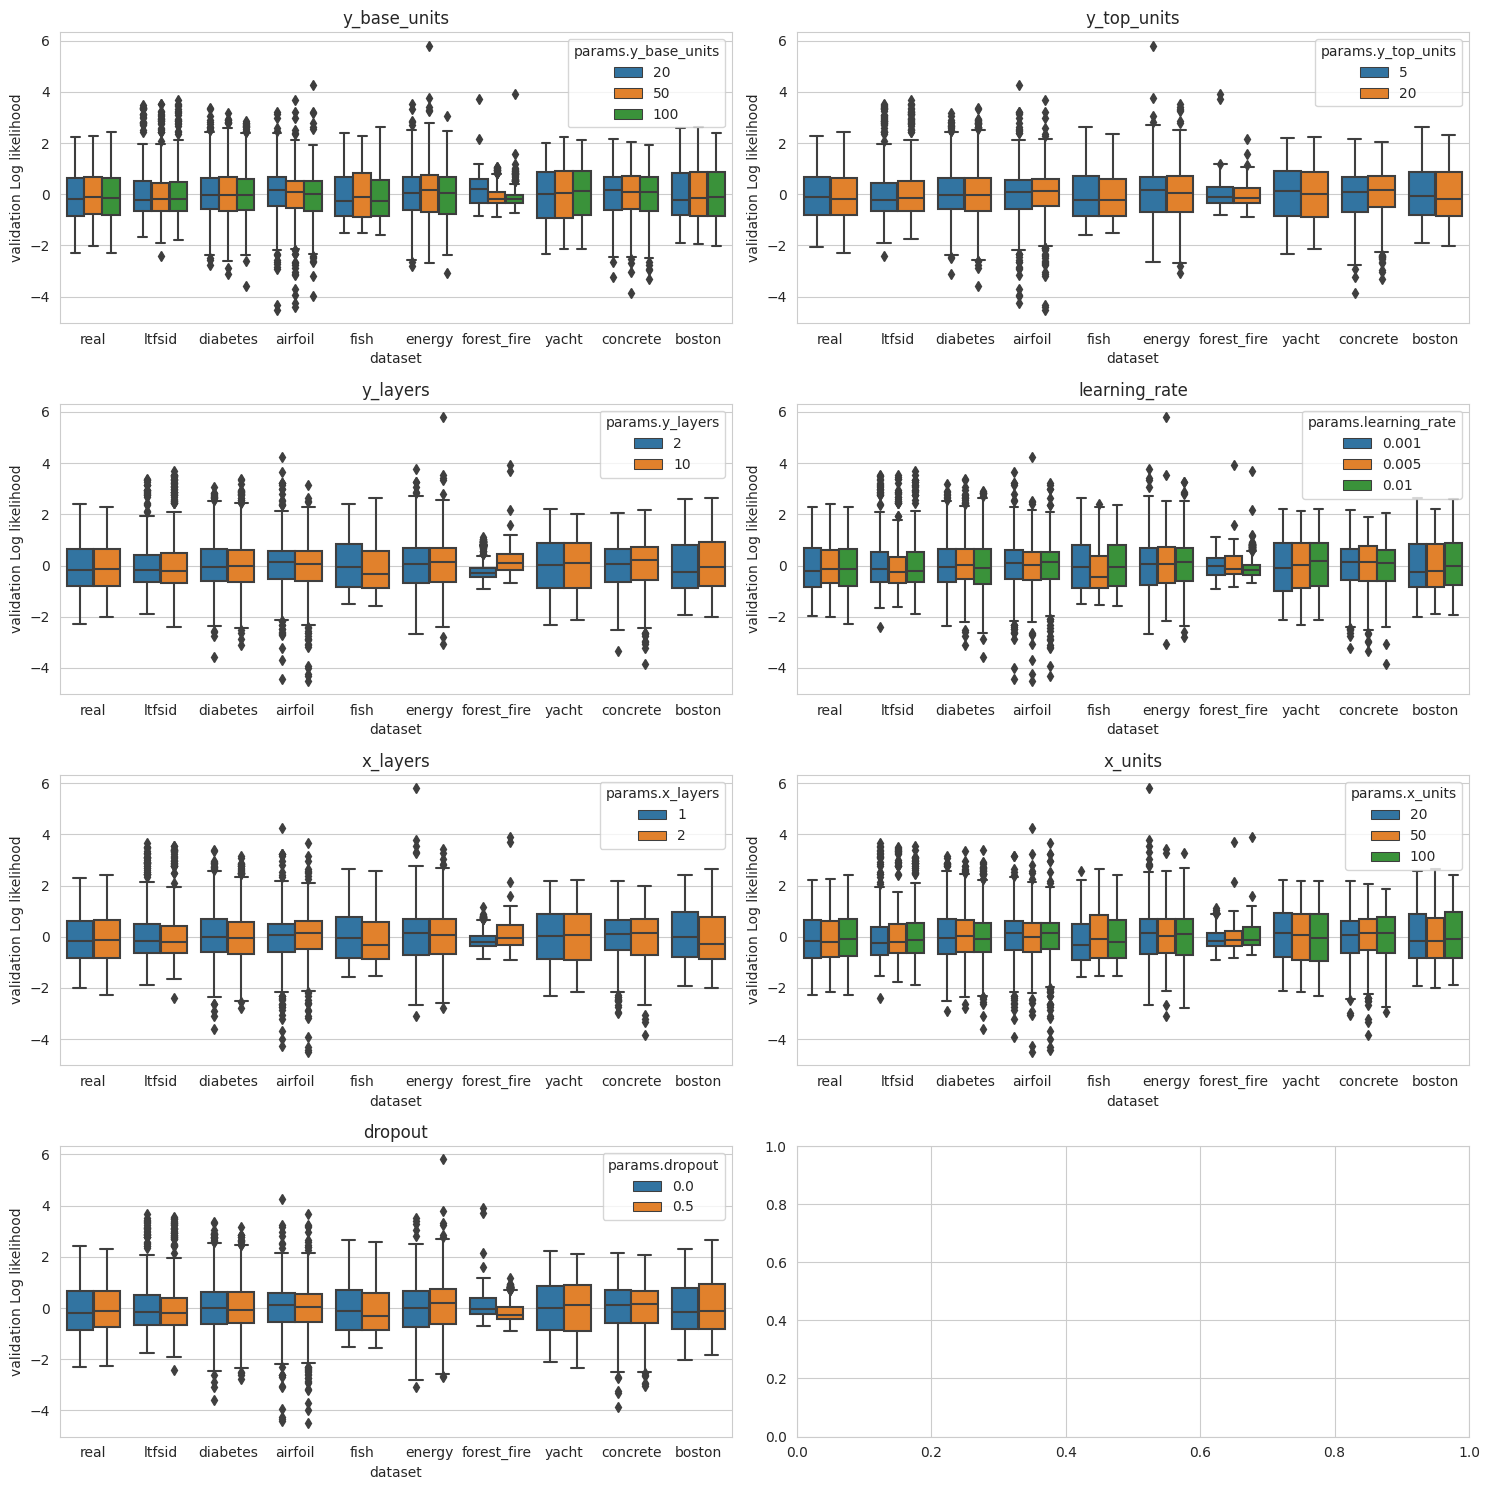

In [162]:
df_ls_ = df[df['params.model_type'] == "ModelType.LS"].copy(True)
df_ls_ = df_ls_[df_ls_['metrics.val_logLik'] < 100.]
# df_ls_ = df_ls_[df_ls_['params.dropout'] == 0.]
fig, axes = plt.subplots(int(np.ceil(len(relevant_params)/2.)), 2, figsize=(15,15))
df_ls_.rename(columns={'val_logLik':r'validation Log likelihood', 'ds':'dataset'}, inplace=True)
for ax, param in zip(axes.flatten(), relevant_params):
    sns.boxplot(df_ls_, hue=param, y=r'validation Log likelihood', x='dataset', ax=ax)
    ax.set_title(param.split('.')[1])
fig.tight_layout()

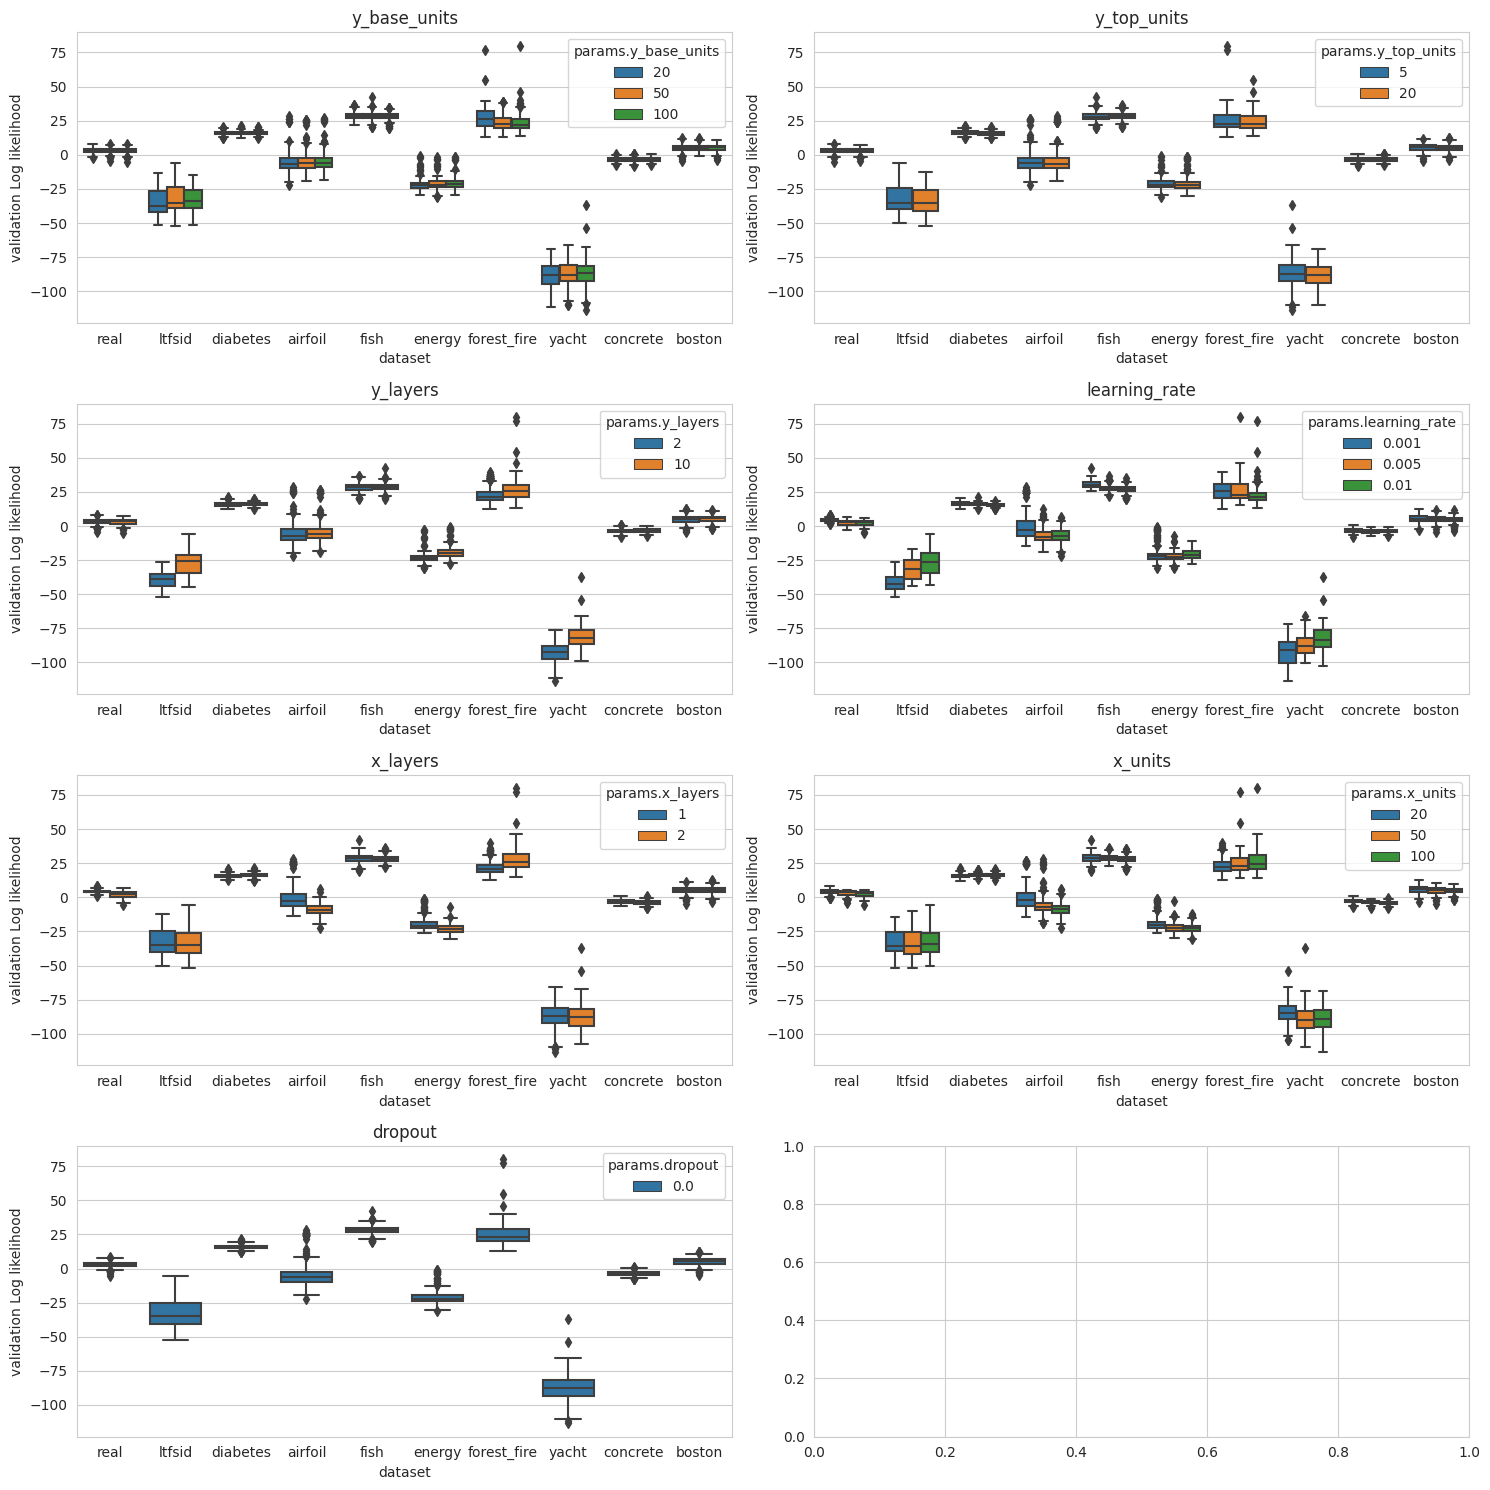

In [133]:
df_ls_ = df[df['params.model_type'] == "ModelType.LS"].copy(True)
df_ls_ = df_ls_[df_ls_['metrics.val_logLik'] < 100.]
df_ls_ = df_ls_[df_ls_['params.dropout'] == 0.]
fig, axes = plt.subplots(int(np.ceil(len(relevant_params)/2.)), 2, figsize=(15,15))
df_ls_.rename(columns={'metrics.val_logLik':r'validation Log likelihood', 'ds':'dataset'}, inplace=True)
for ax, param in zip(axes.flatten(), relevant_params):
    sns.boxplot(df_ls_, hue=param, y=r'validation Log likelihood', x='dataset', ax=ax)
    ax.set_title(param.split('.')[1])
fig.tight_layout()

# Clustermap

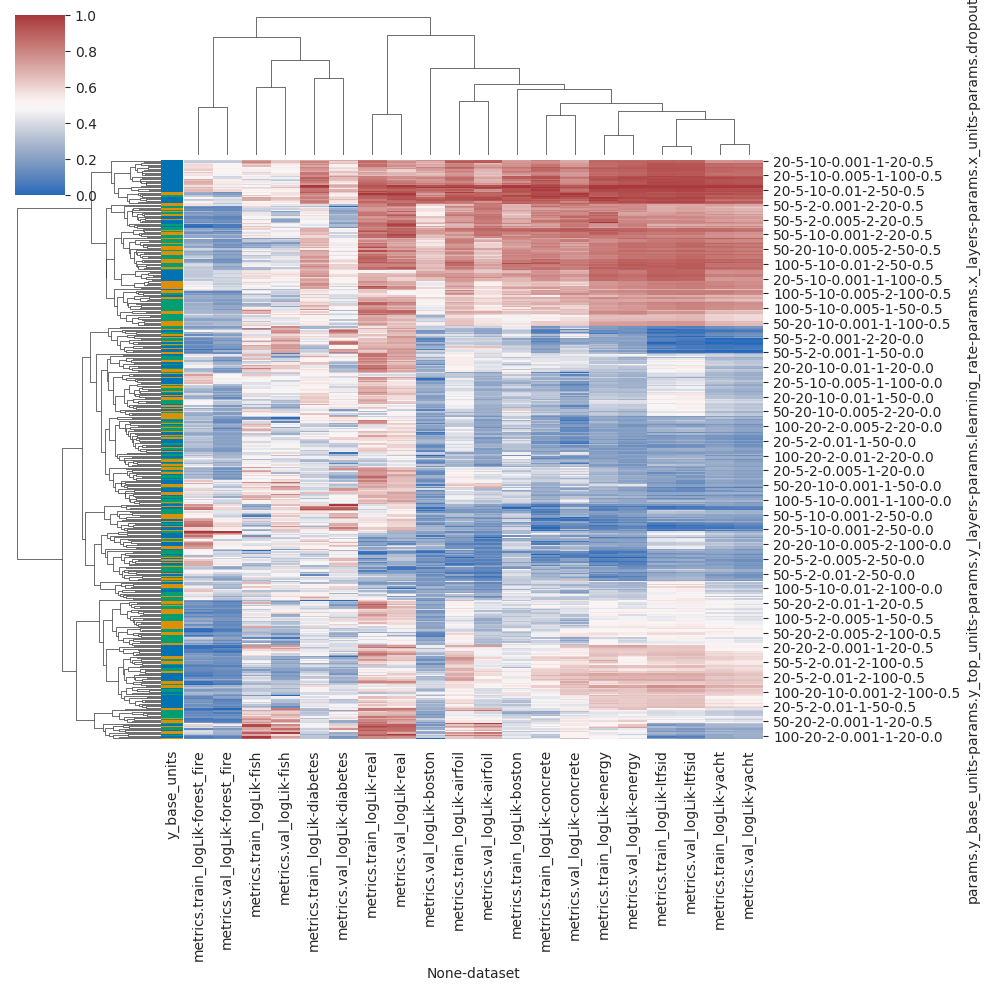

In [139]:
df_ls_ = df_ls.copy(True)
df_ls_ = df_ls_[df_ls_['metrics.val_logLik'] < 100.]
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values=['metrics.val_logLik', 'metrics.train_logLik'], aggfunc=np.mean)
y_base_units = df_ls_.reset_index('params.y_base_units')['params.y_base_units'].to_numpy()
y_base_units = pd.Series(y_base_units, name='y_base_units')
y_base_units.index = df_ls_.index
color = [sns.color_palette()[2], sns.color_palette()[0], sns.color_palette()[3]]
lut = dict(zip(y_base_units.unique(), sns.color_palette('colorblind')))
row_color = y_base_units.map(lut)
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=row_color)

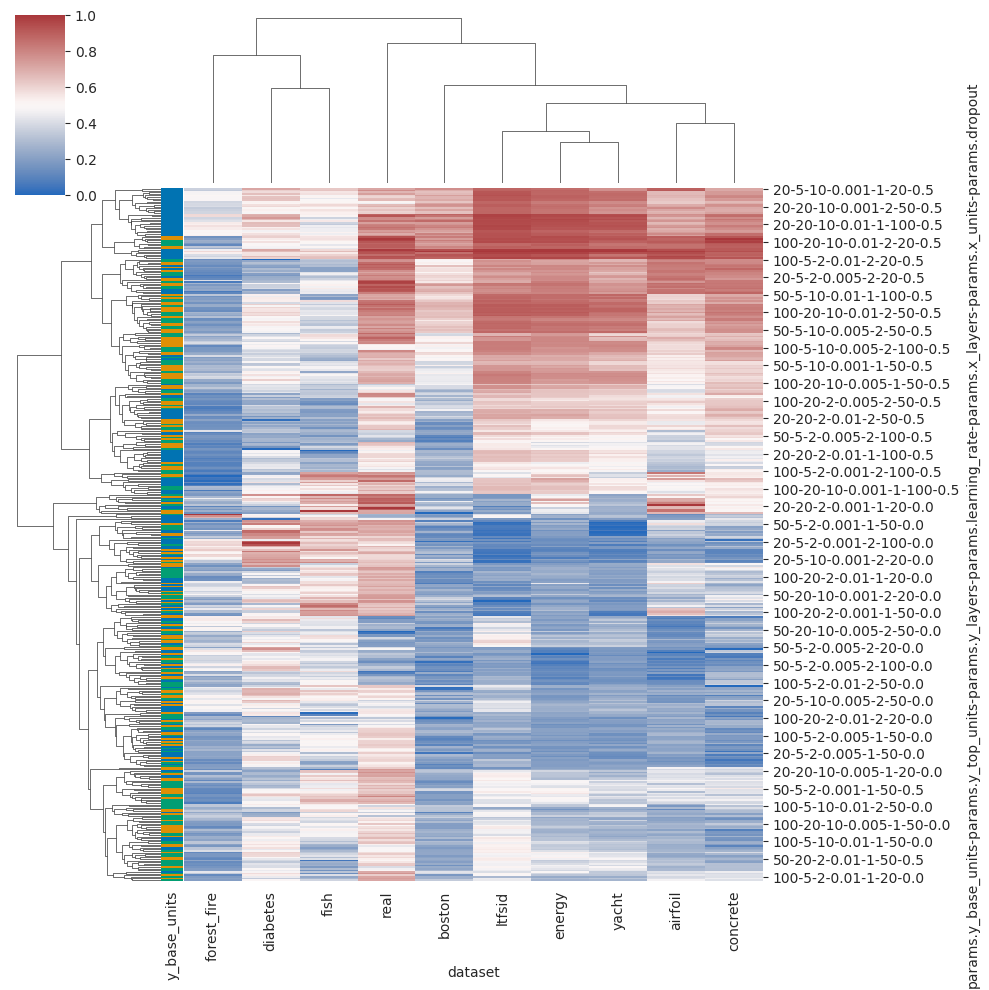

In [140]:
df_ls_ = df_ls.copy(True)
df_ls_ = df_ls_[df_ls_['metrics.val_logLik'] < 100.]
df_ls_.drop(columns=['params.model_type', 'experiment_id', 'metrics.train_logLik'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values='metrics.val_logLik', aggfunc=np.mean)
y_base_units = df_ls_.reset_index('params.y_base_units')['params.y_base_units'].to_numpy()
y_base_units = pd.Series(y_base_units, name='y_base_units')
y_base_units.index = df_ls_.index
color = [sns.color_palette()[2], sns.color_palette()[0], sns.color_palette()[3]]
lut = dict(zip(y_base_units.unique(), sns.color_palette('colorblind')))
row_color = y_base_units.map(lut)
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=row_color)

## color all parameters

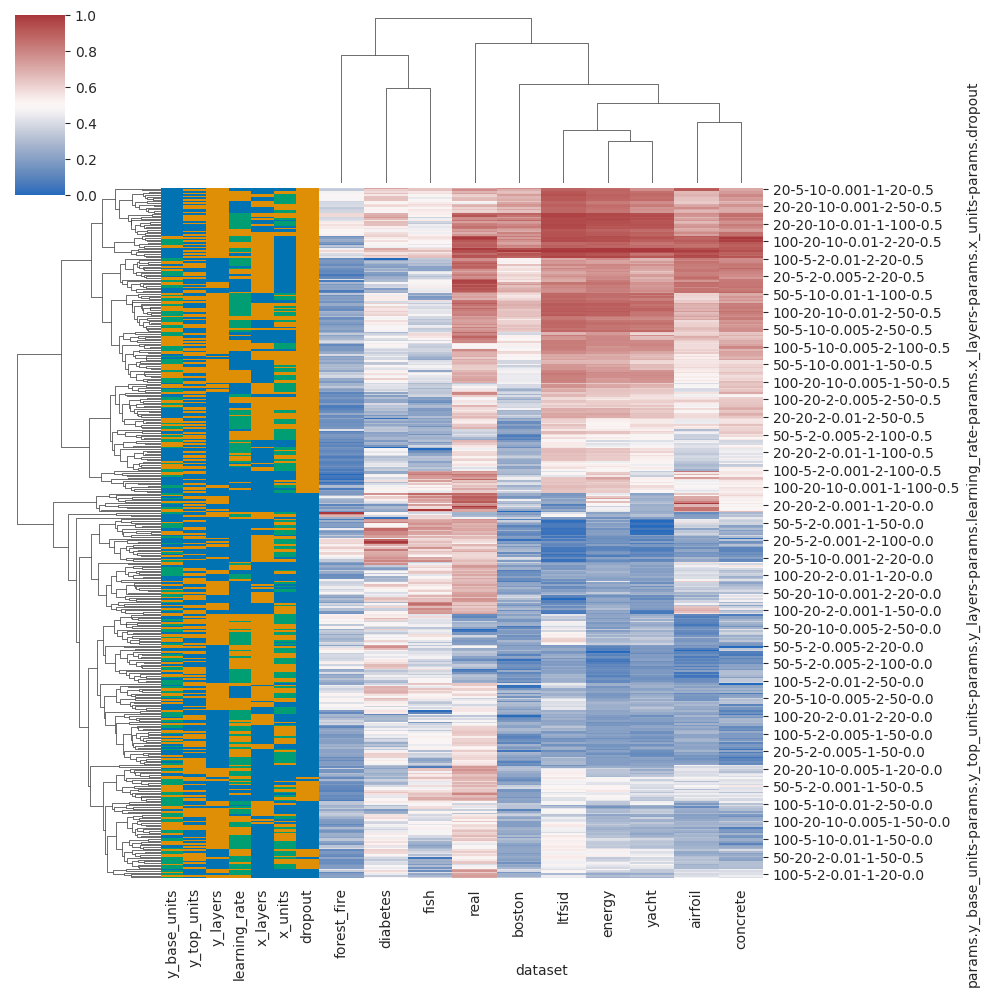

In [141]:
color_param = 'y_top_units'
df_ls_ = df_ls.copy(True)
df_ls_ = df_ls_[df_ls_['metrics.val_logLik'] < 100.]
df_ls_.drop(columns=['params.model_type', 'experiment_id', 'metrics.train_logLik'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values='metrics.val_logLik', aggfunc=np.mean)

def get_color_map(color_param):
    color_param = color_param.split('params.')[1]
    param = df_ls_.reset_index(f'params.{color_param}')[f'params.{color_param}'].to_numpy()
    param = pd.Series(param, name=color_param)
    param.index = df_ls_.index
    lut = dict(zip(param.unique(), sns.color_palette('colorblind')))
    return param.map(lut)
row_colors = [get_color_map(p) for p in relevant_params]
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=pd.DataFrame(row_colors).T)

## color only relevant parameters

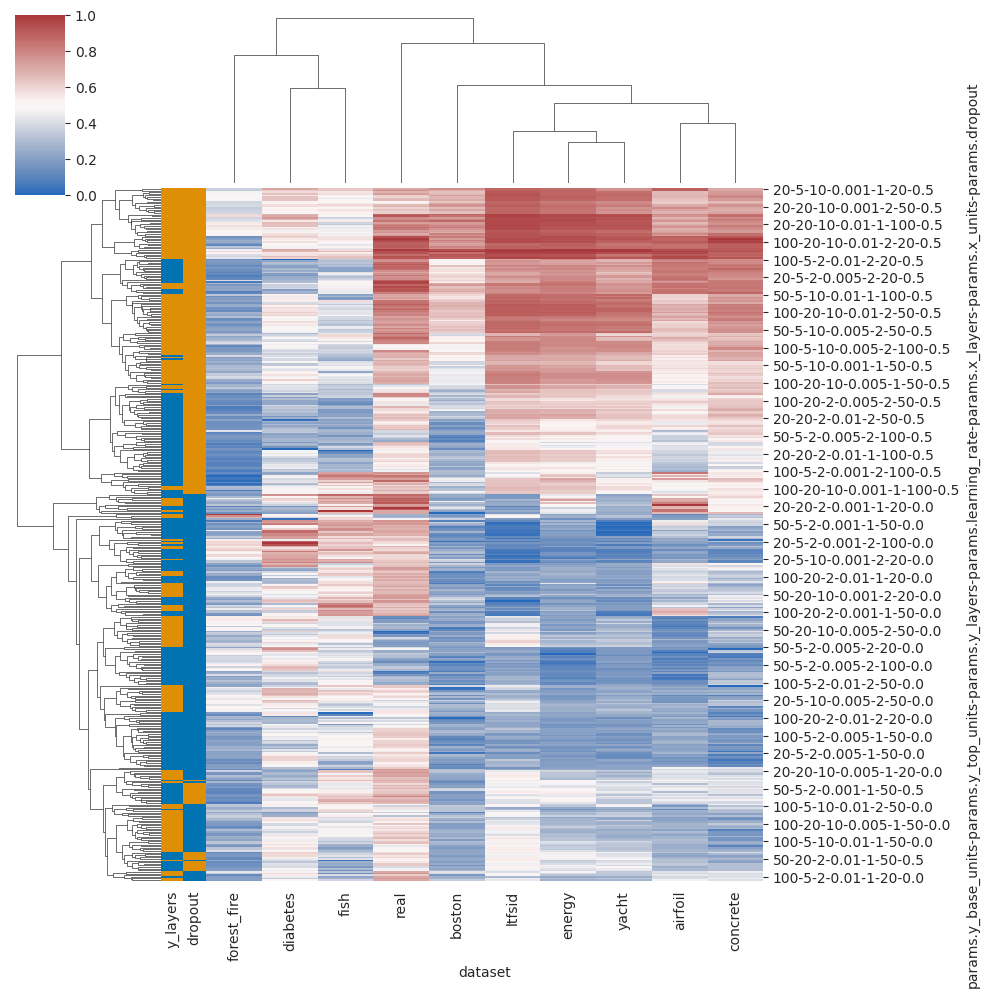

In [143]:
color_param = 'y_top_units'
df_ls_ = df_ls.copy(True)
df_ls_ = df_ls_[df_ls_['metrics.val_logLik'] < 100.]
df_ls_.drop(columns=['params.model_type', 'experiment_id', 'metrics.train_logLik'], inplace=True)
df_ls_.rename(columns={'ds':'dataset'}, inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="dataset", values='metrics.val_logLik', aggfunc=np.mean)

def get_color_map(color_param):
    color_param = color_param.split('params.')[1]
    param = df_ls_.reset_index(f'params.{color_param}')[f'params.{color_param}'].to_numpy()
    param = pd.Series(param, name=color_param)
    param.index = df_ls_.index
    lut = dict(zip(param.unique(), sns.color_palette('colorblind')))
    return param.map(lut)
row_colors = [get_color_map(p) for p in ['params.y_layers', 'params.dropout']]
sns.clustermap(df_ls_, cmap="vlag", standard_scale=1, row_colors=pd.DataFrame(row_colors).T)

# drash

In [174]:
from sklearn.linear_model import LinearRegression
y = df_ls['metrics.val_logLik'].to_numpy()[:,None]
print(y.shape)
for p in relevant_params:
    print(p)
    X = df_ls[p].to_numpy()[:,None]
    y = df_ls['metrics.val_logLik']
    print(X.shape)
    print(X.shape)
    model = LinearRegression()
    model.fit(X,y)
    print(model.coef_)

(9720, 1)
params.y_base_units
(9720, 1)
(9720, 1)
[1.71987022]
params.y_top_units
(9720, 1)
(9720, 1)
[-0.56181765]
params.x_dropout
(9720, 1)
(9720, 1)
[-99.0386122]
params.learning_rate
(9720, 1)
(9720, 1)
[-4782.36900768]
params.x_layers
(9720, 1)
(9720, 1)
[3.9877005]
params.x_units
(9720, 1)
(9720, 1)
[0.04295031]
params.y_dropout
(9720, 1)
(9720, 1)
[-99.0386122]


In [185]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [202]:
for dataset, df_ds in df_ls.drop(columns=['params.model_type', 'experiment_id']).groupby('ds'):
    test = df_ds.drop(columns='ds')
    # print(df_ds)
    break
tes

,params.y_base_units,params.y_top_units,params.x_dropout,params.learning_rate,params.x_layers,params.x_units,params.seed,params.y_dropout,metrics.val_logLik
1,20,10,0.1,0.0001,1,100,2,0.1,6.330238
4,20,10,0.1,0.0010,1,100,2,0.1,-0.777696
6,20,10,0.1,0.0100,1,100,2,0.1,2.193360
7,100,20,0.1,0.0001,2,50,1,0.1,1.868301
11,20,10,0.1,0.0001,1,50,3,0.1,6.970502
...,...,...,...,...,...,...,...,...,...
1939,50,10,0.0,0.0100,1,100,1,0.0,-1.126688
1940,50,5,0.0,0.0100,2,50,1,0.0,-1.452015
1941,20,20,0.0,0.0100,1,50,1,0.0,1.930776
1942,20,10,0.0,0.0100,2,20,1,0.0,0.723718


In [ ]:
corrwith(test['metrics.val_logLik'])

In [209]:
test['metrics.val_logLik']

1       6.330238
4      -0.777696
6       2.193360
7       1.868301
11      6.970502
          ...   
1939   -1.126688
1940   -1.452015
1941    1.930776
1942    0.723718
1943    0.662427
Name: metrics.val_logLik, Length: 972, dtype: float64

In [211]:
test[relevant_params].corrwith(test['metrics.val_logLik'], method='spearman')

params.y_base_units     0.025870
params.y_top_units      0.020931
params.x_dropout        0.068909
params.learning_rate   -0.404190
params.x_layers        -0.510487
params.x_units         -0.426000
params.y_dropout        0.068909
dtype: float64

In [207]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [215]:
sns.swarmplot(df, x='params.y_base_units', y='metrics.val_logLik', hue='ds')


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fdbcf288700> (for post_execute):


KeyboardInterrupt: 

# Rerun exp

In [2]:
from hp import *
from utils import *
get_hp_space()[0]

2023-05-10 14:44:34.825017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 14:44:34.857089: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 14:44:34.857629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 14:44:35.376567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 14:44:36.015622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

{'seed': 1,
 'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0},
 'net_y_size_trunk_args': {'y_base_units': 20, 'y_top_units': 5, 'dropout': 0},
 'optimizer': <keras.optimizers.legacy.adam.Adam at 0x7f0f1e63e9b0>,
 'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>,
 'model_type': <ModelType.LS: 'ls'>}

In [18]:
data_path = "energy"

log_file: str = "train.log"
log_level: str = "info"
setup_logger(log_file, log_level)

logging.info(f"TFP Version {tfp.__version__}")
logging.info(f"TF  Version {tf.__version__}")

setup_folders(data_path)

hp_space = {
            "seed": 1,
            "net_x_arch_trunk_args": {
                "x_units": 20,
                "x_layers": 1,
                "dropout": 0,
            },
            "net_y_size_trunk_args": {
                "y_base_units": 100,
                "y_top_units": 5,
                "dropout": 0.0,
            },
            "optimizer": Adam(learning_rate=1e-3),
            "base_distribution": tfd.Normal(loc=0, scale=1),
            "model_type": ModelType.LS,
        }
print(hp_space)
logging.info(f"Size of search space: {len(hp_space)}")

mlflow.autolog()
experiment_id = mlflow.set_experiment(f"{data_path}_runs")


frame = inspect.currentframe()
args, _, _, values = inspect.getargvalues(frame)
arg_vals = {arg: values[arg] for arg in args}

fit_args = (hp_space, data_path, experiment_id.experiment_id, arg_vals, False)
fit_args

INFO:root:TFP Version 0.19.0
INFO:root:TF  Version 2.12.0
{'seed': 1, 'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0}, 'net_y_size_trunk_args': {'y_base_units': 100, 'y_top_units': 5, 'dropout': 0.0}, 'optimizer': <keras.optimizers.legacy.adam.Adam object at 0x7f0e6421b6d0>, 'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>, 'model_type': <ModelType.LS: 'ls'>}
INFO:root:Size of search space: 6


2023/05/10 14:58:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/05/10 14:58:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/10 14:58:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023/05/10 14:58:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


({'seed': 1,
  'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0},
  'net_y_size_trunk_args': {'y_base_units': 100,
   'y_top_units': 5,
   'dropout': 0.0},
  'optimizer': <keras.optimizers.legacy.adam.Adam at 0x7f0e6421b6d0>,
  'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>,
  'model_type': <ModelType.LS: 'ls'>},
 'energy',
 '921567085744556525',
 {},
 False)

In [19]:
def fit_func(params, data_path, experiment_id, args, fast):

    data = load_data(data_path)
    train_data = (data["x_train"], data["y_train"])
    val_data = (data["x_test"], data["y_test"])

    mlflow.start_run(experiment_id=experiment_id)

    log_fit_params(args, params)

    model_type = params["model_type"]
    model_kwargs = get_model_kwargs(model_type)
    params = {**params, **model_kwargs}

    x_args = params.pop("net_x_arch_trunk_args")
    params["net_x_arch_trunk"] = relu_network(
        [x_args["x_units"]] * x_args["x_layers"], dropout=x_args["dropout"]
    )
    y_args = params.pop("net_y_size_trunk_args")
    params["net_y_size_trunk"] = nonneg_tanh_network(
        (y_args["y_base_units"], y_args["y_base_units"], y_args["y_top_units"]),
        dropout=y_args["dropout"],
    )

    seed = params.pop("seed")
    set_seeds(seed)

    hist, neat_model = fit(
        epochs=20 if fast else 10_000,
        # epochs=20,
        train_data=train_data,
        val_data=val_data,
        **params,
    )

    mlflow.log_metric("val_logLik", neat_model.evaluate(x=train_data, y=train_data[1]))
    mlflow.log_metric("train_logLik", neat_model.evaluate(x=val_data, y=val_data[1]))

    mlflow.end_run()
    return neat_model, hist

In [20]:
neat_model, hist = fit_func(*fit_args)

INFO:root:setting random seed to 1
Epoch 1/10000
22/22 [==============================] - 1s 8ms/step - logLik: 455.3990 - val_logLik: 110.7015
Epoch 2/10000
22/22 [==============================] - 0s 2ms/step - logLik: 212.2634 - val_logLik: 50.6591
Epoch 3/10000
22/22 [==============================] - 0s 2ms/step - logLik: 94.1016 - val_logLik: 29.9826
Epoch 4/10000
22/22 [==============================] - 0s 2ms/step - logLik: 58.2502 - val_logLik: 19.7449
Epoch 5/10000
22/22 [==============================] - 0s 2ms/step - logLik: 46.1947 - val_logLik: 17.1252
Epoch 6/10000
22/22 [==============================] - 0s 2ms/step - logLik: 41.1811 - val_logLik: 15.5622
Epoch 7/10000
22/22 [==============================] - 0s 2ms/step - logLik: 37.8692 - val_logLik: 14.1020
Epoch 8/10000
22/22 [==============================] - 0s 2ms/step - logLik: 34.6190 - val_logLik: 12.8984
Epoch 9/10000
22/22 [==============================] - 0s 2ms/step - logLik: 31.5040 - val_logLik: 11.5524

2023/05/10 14:59:26 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/05/10 14:59:26 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmppzc8cmbw/model/data/model/assets
INFO:tensorflow:Assets written to: /tmp/tmppzc8cmbw/model/data/model/assets


2023/05/10 14:59:29 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmppzc8cmbw/model, flavor: tensorflow), fall back to return ['tensorflow==2.12.0']. Set logging level to DEBUG to see the full traceback.


INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data/model
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data/model/variables
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/model/data/model/assets
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/tensorboard_logs/train
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/694b733ce9164063859ee186a97b28aa/artifacts/tensorboard_logs/validation
3/3 [==============================] - 0s 1ms/step - logLik: -31.1599


In [16]:
params = fit_args[0]
model_type = params["model_type"]
model_kwargs = get_model_kwargs(model_type)
params = {**params, **model_kwargs}

x_args = params.pop("net_x_arch_trunk_args")
params["net_x_arch_trunk"] = relu_network(
    [x_args["x_units"]] * x_args["x_layers"], dropout=x_args["dropout"]
)
y_args = params.pop("net_y_size_trunk_args")
params["net_y_size_trunk"] = nonneg_tanh_network(
    (y_args["y_base_units"], y_args["y_base_units"], y_args["y_top_units"]),
    dropout=y_args["dropout"],
)

seed = params.pop("seed")
set_seeds(seed)
data = load_data(data_path)
train_data = (data["x_train"], data["y_train"])
neat_model = get_neat_model(dim_features=train_data[0].shape[1], **params)
neat_model

INFO:root:setting random seed to 1


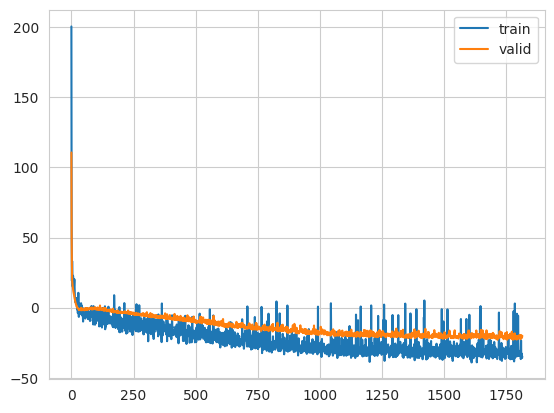

In [21]:
plt.plot(hist.history['logLik'], label='train')
plt.plot(hist.history['val_logLik'], label='valid')
plt.legend()

In [7]:
neat_model

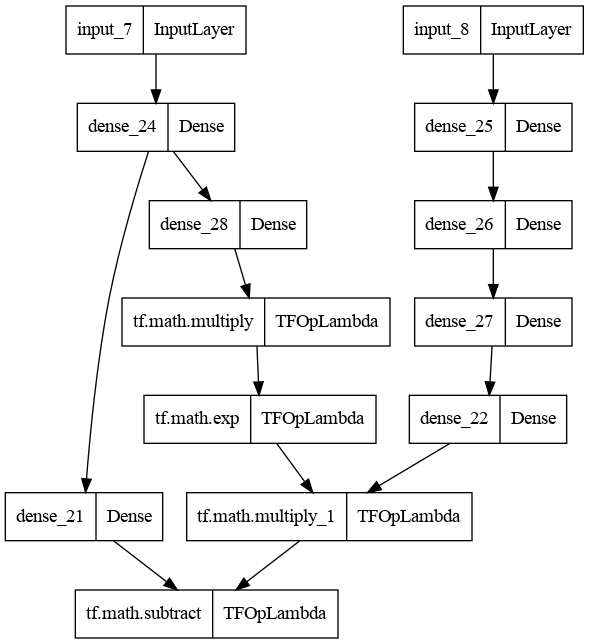

In [17]:
tf.keras.utils.plot_model(neat_model)

4/4 [==============================] - 0s 978us/step


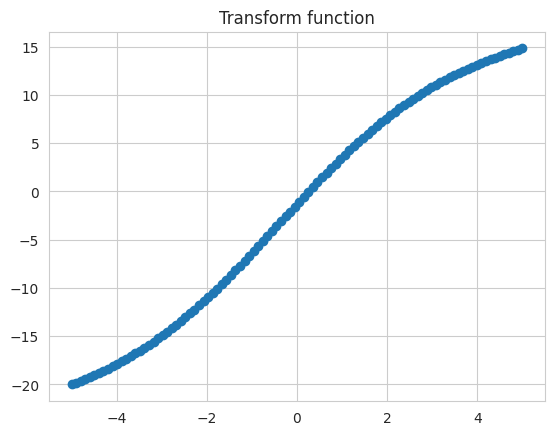

In [22]:
yy = np.linspace(-5,5,100)
xx = np.zeros((yy.shape[0], 8))
z = neat_model.predict((xx,yy))
plt.title("Transform function")
plt.scatter(yy, z)

22/22 [==============================] - 0s 749us/step


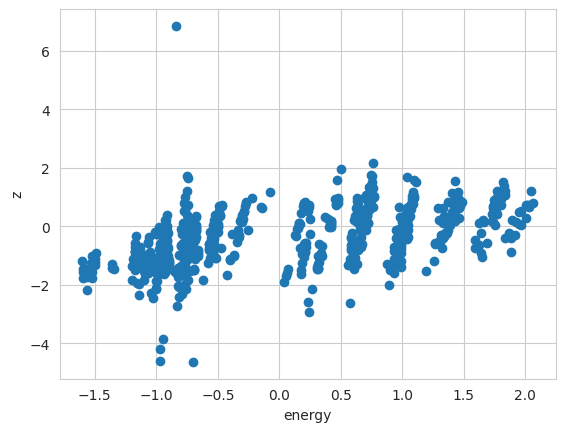

In [23]:
yy = load_data(data_path)['y_train']
xx = load_data(data_path)['x_train']
z = neat_model.predict((xx,yy))
plt.ylabel('z')
plt.xlabel('energy')
plt.scatter(yy, z)

(array([  3.,   1.,   0.,   1.,   6.,  14.,  75., 127., 109., 104., 108.,
         88.,  39.,  13.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([-4.63332224, -4.17390919, -3.71449614, -3.25508308, -2.79567003,
        -2.33625698, -1.87684393, -1.41743088, -0.95801783, -0.49860477,
        -0.03919172,  0.42022133,  0.87963438,  1.33904743,  1.79846048,
         2.25787354,  2.71728659,  3.17669964,  3.63611269,  4.09552574,
         4.55493879,  5.01435184,  5.4737649 ,  5.93317795,  6.392591  ,
         6.85200405]),
 <BarContainer object of 25 artists>)

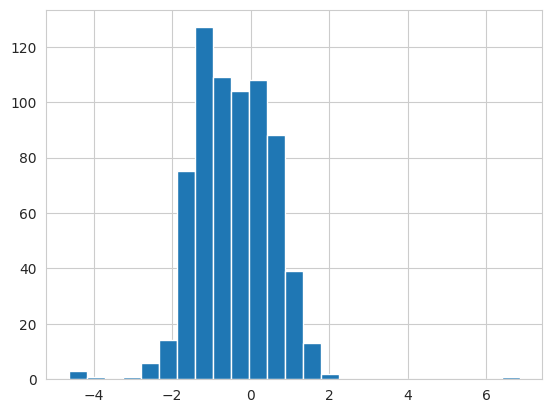

In [24]:
plt.hist(z, bins=25)

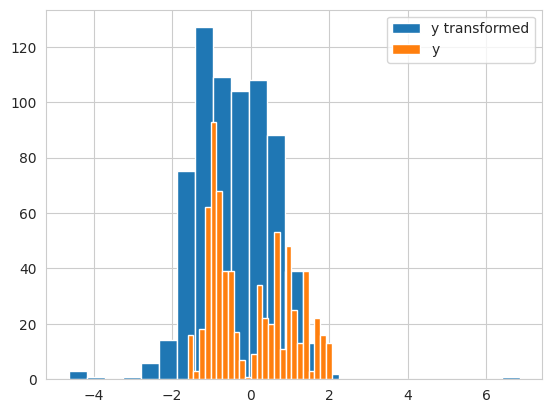

In [25]:
plt.hist(z, bins=25, label="y transformed")
plt.hist(load_data(data_path)['y_train'], bins=25, label="y")
plt.legend()

In [36]:
aa= dict(a=2, b=3,c=5)
aa
print(aa.pop('c', "test"))
aa

5


{'a': 2, 'b': 3}